In [ ]:
#https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [ ]:
#Ver2. : SVC 모델사용(매개변수 조정에 GridSearch사용, 교차검증을 사용한 GridSearchCV 사용 )

In [24]:
#피마 인디언 당뇨병 예측 - 머신러닝 예측 모델을 수립하고, 평가 지표를 적용
#1. 데이터를 로딩한 후 분포와 데이터를 확인해 보세요.
import pandas as pd
pima = pd.read_csv('../data/diabetes.csv')
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
#2. 당뇨병에 걸린 사람과 아닌 사람의 수 확인
pima['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

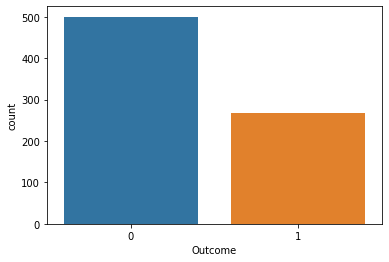

In [26]:
import seaborn as sns
sns.countplot(pima['Outcome'])

In [27]:
#3. feature의 타입과 Null 개수 확인
print(pima.isnull().sum())
print(pima.info())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [28]:
bad_g = pima["SkinThickness"] == 0
pima.loc[bad_g, "SkinThickness"] = None
sum(pima['SkinThickness']==0)

0

In [29]:
bad_g = pima["BloodPressure"] == 0
pima.loc[bad_g, "BloodPressure"] = None
sum(pima['BloodPressure']==0)

0

In [30]:
bad_g = pima["Insulin"] == 0
pima.loc[bad_g, "Insulin"] = None
sum(pima['Insulin']==0)

0

In [31]:
#0인 값을 결측치로 바꾼 후 중간값으로 대체
pima.fillna(pima.mean(), inplace= True)

In [32]:
pima.target = pima['Outcome']

C:\Users\a\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [33]:
pima.data = pima.drop('Outcome', axis = 1)

C:\Users\a\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [34]:
pima.data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72.000000,35.00000,155.548223,33.6,0.627,50
1,1,85,66.000000,29.00000,155.548223,26.6,0.351,31
2,8,183,64.000000,29.15342,155.548223,23.3,0.672,32
3,1,89,66.000000,23.00000,94.000000,28.1,0.167,21
4,0,137,40.000000,35.00000,168.000000,43.1,2.288,33
5,5,116,74.000000,29.15342,155.548223,25.6,0.201,30
6,3,78,50.000000,32.00000,88.000000,31.0,0.248,26
7,10,115,72.405184,29.15342,155.548223,35.3,0.134,29
8,2,197,70.000000,45.00000,543.000000,30.5,0.158,53
9,8,125,96.000000,29.15342,155.548223,0.0,0.232,54


In [35]:
#SVC모델 사용 -> 그리드서치로 최적의 매개변수 찾기
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(pima.data, pima.target, random_state = 0)
print("훈련 세트의 크기: {} 테스트 세트의 크기: {}".format(X_train.shape[0], X_test.shape[0]))
best_score = 0

for gamma  in [0.001, 0.01, 0.01, 1, 10, 100] :
    for C in [0.001, 0.01, 0.01, 1, 10, 100] :
        svm = SVC(gamma = gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        if score > best_score : 
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
print("최고 점수:{:.3f}".format(best_score))
print("최적 매개변수",best_parameters)

#최적의 매개변수를 사용했음에도 ver.1의 로지스틱 회귀보다 점수가 0.01감소 

훈련 세트의 크기: 576 테스트 세트의 크기: 192
최고 점수:0.750
최적 매개변수 {'C': 1, 'gamma': 0.001}


In [36]:
#StandardScaler 사용 후 다시 SVC 적용해보기
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
#교차 검증을 사용한 그리드 서치(교차 검증 성능이 가장 좋은 매개변수로 전체 훈련 데이터셋에 대해 새로운 모델을 만든다)
param_grid = {'C' :[0.001, 0.01, 0.01, 1, 10, 100] ,
             'gamma' : [0.001, 0.01, 0.01, 1, 10, 100]}

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search = GridSearchCV(SVC(), param_grid, cv = 5,return_train_score = True)
grid_search.fit(X_train_scaled, y_train)

print("테스트 세트 점수: {:.3f}".format(grid_search.score(X_test_scaled, y_test)))
print("최적 매개변수:", grid_search.best_params_)
print("최고 교차 검증 점수: {:.3f}".format(grid_search.best_score_))  #best_score_ =교차 검증의 평균 정확도

테스트 세트 점수: 0.792
최적 매개변수: {'C': 1, 'gamma': 0.01}
최고 교차 검증 점수: 0.759


In [40]:
print("최고 성능 모델:\n", grid_search.best_estimator_)

최고 성능 모델:
 SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [41]:
#교차검증 시각화
import numpy as np
pd.set_option('display.max_columns', None)

results = pd.DataFrame(grid_search.cv_results_)
display(np.transpose(results))

#cv_results_ = 그리드 서치의 결과가 담긴 딕셔너리
#행하나가 특정 매개변수 설정에 대응된다.

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
mean_fit_time,0.00740051,0.00460029,0.00460029,0.00480037,0.00580034,0.0126007,0.00480042,0.00480042,0.00480022,0.00580034,0.00980053,0.0132008,0.00460033,0.00480027,0.00500021,0.00580039,0.0102006,0.0132007,0.00480032,0.00480037,0.00400023,0.00720043,0.0118007,0.0144008,0.00480018,0.00480042,0.00480032,0.00860062,0.0154008,0.0158009,0.00500021,0.00800047,0.00800042,0.00800037,0.0146009,0.016401
std_fit_time,0.00215411,0.000489882,0.000489882,0.00040009,0.000399995,0.000489824,0.000400114,0.000400114,0.000400019,0.000399995,0.000399995,0.000399923,0.000489921,0.000400043,1.16801e-07,0.000400019,0.000399995,0.000399971,0.000399947,0.00040009,1.78416e-07,0.00040009,0.000400162,0.00048994,0.000399995,0.000400114,0.000400066,0.000489901,0.000489921,0.000399923,1.16801e-07,0.00063241,0.00063241,0,0.00048994,0.00101995
mean_score_time,0.00139995,0.00100002,0.00100002,0.00119996,0.00120001,0.00300007,0.000999928,0.00120001,0.00120015,0.00120006,0.00140009,0.00280004,0.000999975,0.00120006,0.00100017,0.00140009,0.00140004,0.0032002,0.00140009,0.000999975,0.00100002,0.0012002,0.00160007,0.00300035,0.00100012,0.00100002,0.00100002,0.00140004,0.0012001,0.00300016,0.00100012,0.000800037,0.00100007,0.00180016,0.00180006,0.00300002
std_score_time,0.000800037,1.16801e-07,1.16801e-07,0.000400066,0.000399923,9.53674e-08,0,0.000400043,0.000399971,0.000400019,0.000489901,0.000399971,9.53674e-08,0.000400019,0,0.000489999,0.00048994,0.000399876,0.000489901,9.53674e-08,1.16801e-07,0.000399947,0.000489921,1.90735e-07,1.78416e-07,1.16801e-07,1.90735e-07,0.00048994,0.000399995,1.90735e-07,9.53674e-08,0.000400019,1.16801e-07,0.000400114,0.000400066,0
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,1,1,1,1,1,1,10,10,10,10,10,10,100,100,100,100,100,100
param_gamma,0.001,0.01,0.01,1,10,100,0.001,0.01,0.01,1,10,100,0.001,0.01,0.01,1,10,100,0.001,0.01,0.01,1,10,100,0.001,0.01,0.01,1,10,100,0.001,0.01,0.01,1,10,100
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}","{'C': 0.001, 'gamma': 100}","{'C': 0.01, 'gamma': 0.001}","{'C': 0.01, 'gamma': 0.01}","{'C': 0.01, 'gamma': 0.01}","{'C': 0.01, 'gamma': 1}","{'C': 0.01, 'gamma': 10}","{'C': 0.01, 'gamma': 100}","{'C': 0.01, 'gamma': 0.001}","{'C': 0.01, 'gamma': 0.01}","{'C': 0.01, 'gamma': 0.01}","{'C': 0.01, 'gamma': 1}","{'C': 0.01, 'gamma': 10}","{'C': 0.01, 'gamma': 100}","{'C': 1, 'gamma': 0.001}","{'C': 1, 'gamma': 0.01}","{'C': 1, 'gamma': 0.01}","{'C': 1, 'gamma': 1}","{'C': 1, 'gamma': 10}","{'C': 1, 'gamma': 100}","{'C': 10, 'gamma': 0.001}","{'C': 10, 'gamma': 0.01}","{'C': 10, 'gamma': 0.01}","{'C': 10, 'gamma': 1}","{'C': 10, 'gamma': 10}","{'C': 10, 'gamma': 100}","{'C': 100, 'gamma': 0.001}","{'C': 100, 'gamma': 0.01}","{'C': 100, 'gamma': 0.01}","{'C': 100, 'gamma': 1}","{'C': 100, 'gamma': 10}","{'C': 100, 'gamma': 100}"
split0_test_score,0.637931,0.637931,0.637931,0.637931,0.637931,0.637931,0.637931,0.637931,0.637931,0.637931,0.637931,0.637931,0.637931,0.637931,0.637931,0.637931,0.637931,0.637931,0.637931,0.75,0.75,0.62069,0.637931,0.637931,0.75,0.75,0.75,0.62069,0.637931,0.637931,0.758621,0.75,0.75,0.62069,0.637931,0.637931
split1_test_score,0.643478,0.643478,0.643478,0.643478,0.643478,0.643478,0.643478,0.643478,0.643478,0.643478,0.643478,0.643478,0.643478,0.643478,0.643478,0.643478,0.643478,0.643478,0.643478,0.782609,0.782609,0.695652,0.643478,0.643478,0.782609,0.773913,0.773913,0.713043,0.634783,0.643478,0.791304,0.8,0.8,0.713043,0.634783,0.643478
split2_test_score,0.643478,0.643478,0.643478,0.643478,0.643478,0.643478,0.643478,0.643478,0.643478,0.643478,0.643478,0.643478,0.643478,0.643478,0.643478,0.643478,0.643478,0.643478,0.643478,0.765217,0.765217,0.678261,0.643478,0.643478,0.756522,0.721739,0.721739,0.686957,0.643478,0.643478,0.7391

C:\Users\a\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\a\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


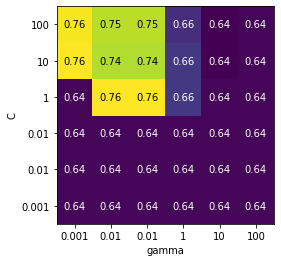

In [43]:
#2차원 그리드(C와 gamma)이므로 히트맵으로 시각화 할 수 있다.

#교차 검증의 평균을 뽑아서 C와 gamma 축에 맞도록 배열 차원을 바꿔준다.
import mglearn
scores = np.array(results.mean_test_score).reshape(6, 6)

mglearn.tools.heatmap(scores, xlabel = 'gamma', xticklabels = param_grid['gamma'],
                     ylabel = 'C', yticklabels = param_grid['C'], cmap = 'viridis')

#SVC가 매개변수 설정에 민감함을 알 수 있다. -> 매개변수 설정이 중요